In [1]:
from skimage import data, img_as_float
from skimage.util import random_noise
import matplotlib.pyplot as plt

import numpy as np
import cv2

original = img_as_float(data.chelsea()[100:250, 50:300])

sigma = 0.1
noisy = random_noise(original, var=sigma**2)

In [2]:
kernel = np.ones((3,3),np.float32)/9
dst = cv2.filter2D(noisy,-1,kernel)

In [3]:
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

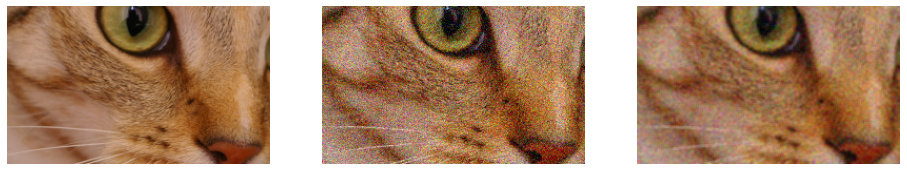

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,10)) 

ax[0].imshow(original) 
ax[0].axis('off')  
ax[1].imshow(noisy) 
ax[1].axis('off')  
ax[2].imshow(dst) 
ax[2].axis('off')  
plt.show() 

In [5]:
kernel = np.array([[1,2,1],[2,4,2],[1,2,1]])/16
kernel

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

In [6]:
mean_img = cv2.filter2D(noisy,-1,kernel)

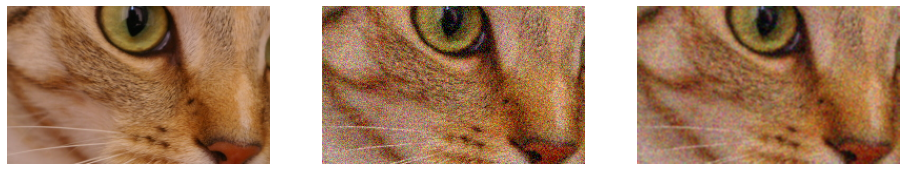

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,10)) 

ax[0].imshow(original) 
ax[0].axis('off')  
ax[1].imshow(noisy) 
ax[1].axis('off')  
ax[2].imshow(mean_img) 
ax[2].axis('off')  
plt.show() 

In [8]:
noisy = 255 * noisy

In [9]:
noisy = noisy.astype(np.uint8)

In [10]:
med_img = cv2.medianBlur(noisy, 3)

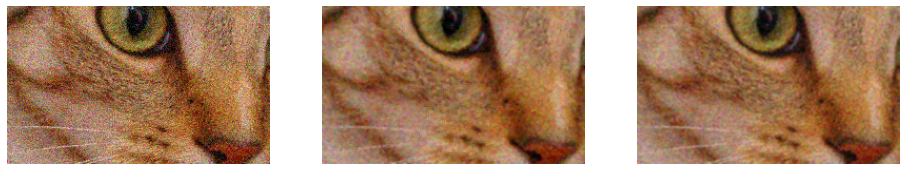

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,10)) 

ax[0].imshow(noisy) 
ax[0].axis('off')  
ax[1].imshow(med_img) 
ax[1].axis('off')  
ax[2].imshow(mean_img) 
ax[2].axis('off')  
plt.show() 

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('fruits.png')

kernel = np.ones((3,3),np.float32)/9
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

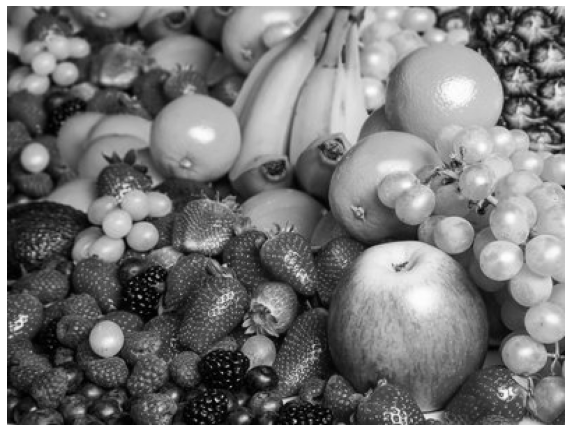

In [13]:
fig, ax = plt.subplots(figsize=(10,10)) 

ax.imshow(img, cmap='gray') 
ax.axis('off')  
plt.show() 

In [14]:
dst = cv2.filter2D(img,-1,kernel)

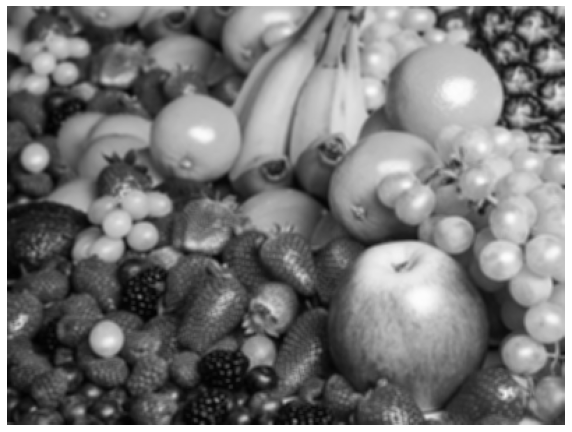

In [15]:
fig, ax = plt.subplots(figsize=(10,10)) 

ax.imshow(dst, cmap='gray') 
ax.axis('off')  
plt.show() 

In [16]:
med_img = cv2.medianBlur(img, 3)

In [17]:
img.shape

(300, 400, 3)

In [18]:
original.shape

(150, 250, 3)

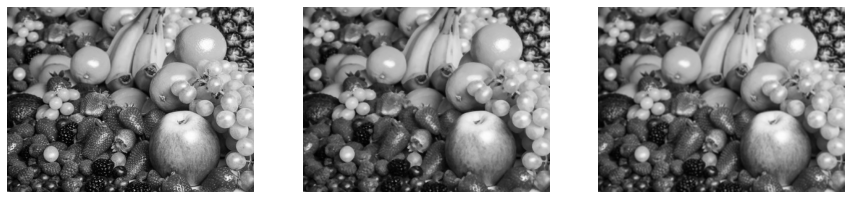

In [19]:
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(15,5)) 

ax[0].imshow(img, cmap='gray') 
ax[0].axis('off')
ax[1].imshow(med_img, cmap='gray') 
ax[1].axis('off')  
ax[2].imshow(dst, cmap='gray') 
ax[2].axis('off')  

plt.show() 

In [20]:
img2 = img[:4,:4]

In [21]:
img2

array([[[89, 89, 89],
        [84, 84, 84],
        [79, 79, 79],
        [74, 74, 74]],

       [[86, 86, 86],
        [81, 81, 81],
        [77, 77, 77],
        [73, 73, 73]],

       [[81, 81, 81],
        [77, 77, 77],
        [73, 73, 73],
        [73, 73, 73]],

       [[77, 77, 77],
        [74, 74, 74],
        [71, 71, 71],
        [73, 73, 73]]], dtype=uint8)

In [22]:
dst2 = dst[:4, :4]
dst2

array([[[84, 84, 84],
        [82, 82, 82],
        [78, 78, 78],
        [74, 74, 74]],

       [[82, 82, 82],
        [81, 81, 81],
        [77, 77, 77],
        [74, 74, 74]],

       [[79, 79, 79],
        [77, 77, 77],
        [75, 75, 75],
        [74, 74, 74]],

       [[75, 75, 75],
        [74, 74, 74],
        [73, 73, 73],
        [74, 74, 74]]], dtype=uint8)

# Boundary Padding

In [23]:
res = cv2.copyMakeBorder(img2, 1,1, 1, 1, cv2.BORDER_DEFAULT);

In [24]:
res

array([[[81, 81, 81],
        [86, 86, 86],
        [81, 81, 81],
        [77, 77, 77],
        [73, 73, 73],
        [77, 77, 77]],

       [[84, 84, 84],
        [89, 89, 89],
        [84, 84, 84],
        [79, 79, 79],
        [74, 74, 74],
        [79, 79, 79]],

       [[81, 81, 81],
        [86, 86, 86],
        [81, 81, 81],
        [77, 77, 77],
        [73, 73, 73],
        [77, 77, 77]],

       [[77, 77, 77],
        [81, 81, 81],
        [77, 77, 77],
        [73, 73, 73],
        [73, 73, 73],
        [73, 73, 73]],

       [[74, 74, 74],
        [77, 77, 77],
        [74, 74, 74],
        [71, 71, 71],
        [73, 73, 73],
        [71, 71, 71]],

       [[77, 77, 77],
        [81, 81, 81],
        [77, 77, 77],
        [73, 73, 73],
        [73, 73, 73],
        [73, 73, 73]]], dtype=uint8)

In [25]:
res.shape

(6, 6, 3)

In [26]:
res = cv2.copyMakeBorder(img2, 1,1, 1, 1, cv2.BORDER_CONSTANT);

In [27]:
res

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [89, 89, 89],
        [84, 84, 84],
        [79, 79, 79],
        [74, 74, 74],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [86, 86, 86],
        [81, 81, 81],
        [77, 77, 77],
        [73, 73, 73],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [81, 81, 81],
        [77, 77, 77],
        [73, 73, 73],
        [73, 73, 73],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [77, 77, 77],
        [74, 74, 74],
        [71, 71, 71],
        [73, 73, 73],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [28]:
res = cv2.copyMakeBorder(img2, 1,1, 1, 1, cv2.BORDER_REPLICATE);

In [29]:
res

array([[[89, 89, 89],
        [89, 89, 89],
        [84, 84, 84],
        [79, 79, 79],
        [74, 74, 74],
        [74, 74, 74]],

       [[89, 89, 89],
        [89, 89, 89],
        [84, 84, 84],
        [79, 79, 79],
        [74, 74, 74],
        [74, 74, 74]],

       [[86, 86, 86],
        [86, 86, 86],
        [81, 81, 81],
        [77, 77, 77],
        [73, 73, 73],
        [73, 73, 73]],

       [[81, 81, 81],
        [81, 81, 81],
        [77, 77, 77],
        [73, 73, 73],
        [73, 73, 73],
        [73, 73, 73]],

       [[77, 77, 77],
        [77, 77, 77],
        [74, 74, 74],
        [71, 71, 71],
        [73, 73, 73],
        [73, 73, 73]],

       [[77, 77, 77],
        [77, 77, 77],
        [74, 74, 74],
        [71, 71, 71],
        [73, 73, 73],
        [73, 73, 73]]], dtype=uint8)